# MCMC Double Slit Reconstruction
Le Nguyen

http://physics.mq.edu.au/~jcresser/Phys301/Chapters/Chapter4.pdf

# The Set Up

For this project I would like to take a distribution for the double slit experiment and reconstruct the mass and velocity of the particle that was 

In [1]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

In [2]:
def double_slit(a,d,lamb,l,x):
    
    #Calculating some constants
    c = (np.pi*d)/(lamb*l)
    k = (np.pi*a)/(lamb*l)
    
    #Probability function
    f = ((np.cos(c))**2)*(((np.sin(k*x))/(k*x))**2)
    
    return f


def montecarlo(a,d,lamb,l):
    
    #Monte carlo throw for a particle
    x = np.random.uniform(-10.,10.)
    
    f = double_slit(a,d,lamb,l,x)
    rand = np.random.uniform(0,1)
    
    if (rand <= f):
        return x
    
#Parameters of our system
m= 5 #Mass
v= 10 #velocity                     

lamb= 1./(m*v) #"de broglie wavelength", scaled to be used in this modeled. 
a = .1 #Slit width
d = 10 #Distance between slits
l = 10 #Distance to screen

truth = [m,v]

particles = []

for i in range(100000):
    y = np.random.uniform(0,1)
    
    x = montecarlo(a,d,lamb,l)
    if x != None:
        particles.append([x,y])
    
        

9644


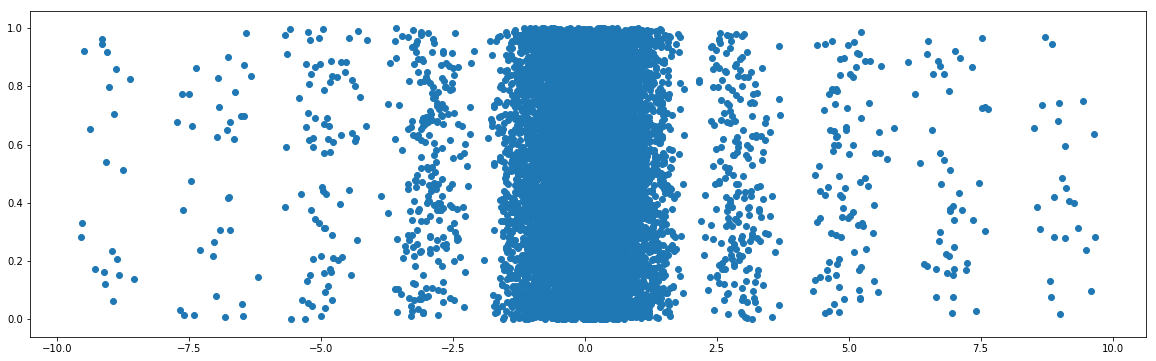

<Figure size 864x432 with 0 Axes>

In [3]:
#Visualize Theoretical Output
print(len(particles))
particles = np.array(particles)
plt.figure(figsize = (20,6))
plt.scatter(particles[:,0],particles[:,1])
plt.show() 

plt.figure(figsize = (12,6))

plt.tight_layout()
plt.show()


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


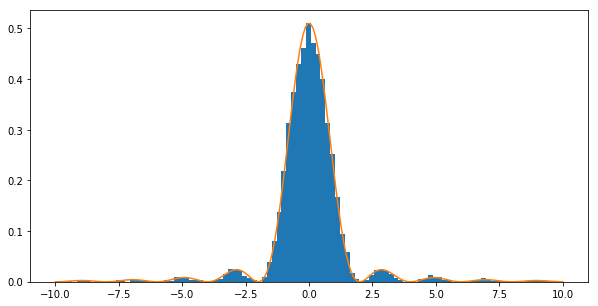

In [4]:
#Showing that the generated model fits the theoretical model.
plt.figure(figsize = (10,5))
y,x,_ = plt.hist(particles[:,0], normed = True, bins = 100)
p = y
p = np.array(p)

x = np.linspace(-10,10,200)

plt.plot(x,max(p)*double_slit(a,d,lamb,l,x))

Off of the double slit distribution, can we reconstruct the mass and velocity of the particle?

# The MCMC

In [5]:
#We know the model we're using to generate, but need to reconstruct the constants
def double_slit2(m,v,a,d,l,x):
    
    #Calculating some constants
    c = (np.pi*d)/((1/(m*v))*l)
    k = (np.pi*a)/((1/(m*v))*l)
    
    #Probability function
    f = ((np.cos(c))**2)*(((np.sin(k*x))/(k*x))**2)
    
    return f

#Error calculation used to roll the probablity of updating the parameters
def calculate_error(actual, model, sigma):
    
    return ((actual-model)**2/(2*sigma**2)).sum()/(actual.size)


def find_fit(x,y):
    for i in range(len(y)):
        if y[i] == max(y):
            j = i

    fit.append(x[j+1])


In [6]:
#m,   v,   a,   d,   l

np.random.seed(12345678) #Just a random seed I set, feel free to change it. 

#Starting with a random guess, but bonding the numbers for the sake of computational time. 
m_guess = np.random.uniform(1,5)
v_guess = np.random.uniform(m_guess,10)

params = [[m_guess], [v_guess], [.1], [10], [10]]

temp_params = []

# Setting up statistical parameters

sigma = .001
num_sample_points = 100000
step_size = .1

x = np.linspace(-10, 10, num_sample_points)

# Loop runs Markov Chain

for i in range(0,num_sample_points,1):
    
    
    #Step size decrease as the Markove Chain runs to hone in on a more percise value. 
    if i == int(num_sample_points *.3):
        step_size *=.1
    elif i == int(num_sample_points * .5):
        step_size *= .1
        
    # Steps temporary values with random value
    for j in range(0,2):
        rand = np.random.uniform(-1,1)
        if i == 0:
            temp_params.append([params[j][i] + rand * step_size])
        else:
            temp_params[j].append(params[j][i] + rand * step_size)

    # Plugs starting and temporary values into the Maxwell Function
   
    f1 = double_slit2(params[0][i], params[1][i], a, d, l, x[i])
    f2 = double_slit2(temp_params[0][i], temp_params[1][i], a, d, l, x[i])

    # Calculates error
    
    X1 = calculate_error(p, max(p)*f1, sigma)
    X2 = calculate_error(p, max(p)*f2, sigma)

    # Calculated probability the parameters change

    prob = np.exp(-(X2 - X1))
        
    rand2 = np.random.uniform(0,1)

# Updates parameters if the random number above is less than the probability

    if rand2 < prob:
        for k in range(0, 2):
            params[k].append(temp_params[k][i])  
    else:
        for k in range(0, 2):
            params[k].append(params[k][i])

    if i % (num_sample_points / 10) == 0:
        print(('%d Percent') % (i / num_sample_points * 100))

print('Finished')

0 Percent
10 Percent
20 Percent
30 Percent
40 Percent
50 Percent
60 Percent
70 Percent
80 Percent
90 Percent
Finished


# The Analysis

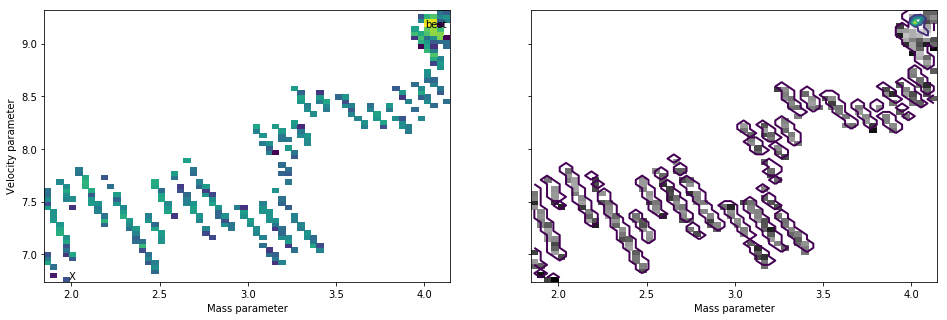

In [7]:
from matplotlib.colors import LogNorm

fig, [colored, bw] = plt.subplots(1,2, sharey=True, figsize = (16, 5))

counts, xbin, ybin, img = colored.hist2d(params[0], params[1], bins=64, norm=LogNorm())
colored.annotate('X', xy=(params[0][0], params[1][0]))

# use np.argwhere() to find the bin(s) with the max counts
max_location = np.argwhere(counts == counts.max())

# Use the location of the max to find the best width and intercept parameters
best_mass = xbin[max_location[0,0]]
best_velocity = ybin[max_location[0,1]]
colored.annotate('best', xy=(best_mass, best_velocity))

bw.hist2d(params[0], params[1], bins=60, norm=LogNorm(), cmap='gray')
bw.contour(0.5*(xbin[1:]+xbin[:-1]), 0.5*(ybin[1:]+ybin[1:]), counts.transpose(), linewidths=2)

colored.set_xlabel("Mass parameter")
colored.set_ylabel("Velocity parameter")
bw.set_xlabel("Mass parameter")
plt.show()

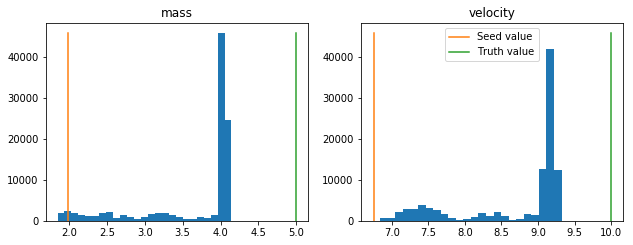

Guess:  1.9832169352996103 6.764655677743697
Truth:  [5, 10]
MCMC: [4.052936616835355, 9.217022051411682]


<Figure size 432x288 with 0 Axes>

In [8]:
#Looking at the MCMC output
plt.figure(figsize = (16,8))
fit = []

plt.subplot(2,3,1)
y1, x1,_ = plt.hist(params[0], bins = 25)
plt.plot([params[0][0],params[0][0]],[0,y1.max()], label = "Seed value")
plt.plot([m,m],[0,y1.max()], label = "Truth value")
plt.title("mass")
find_fit(x1,y1)

plt.subplot(2,3,2)
y2, x2,_ = plt.hist(params[1], bins = 25)
plt.plot([params[1][0],params[1][0]],[0,y1.max()], label = "Seed value")
plt.plot([v,v],[0,y1.max()], label = "Truth value")
plt.title("velocity")
find_fit(x2,y2)

plt.legend()
plt.show()
plt.tight_layout()
print("Guess: ", m_guess, v_guess)
print("Truth: ", truth)
print("MCMC:", fit)

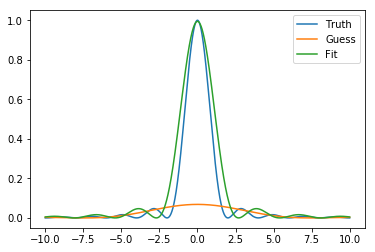

In [9]:
plt.plot(x,double_slit(a,d,lamb,l,x),label = "Truth")
plt.plot(x,double_slit2(params[0][0],params[1][0],a,d,l,x), label = "Guess")
plt.plot(x,double_slit2(params[0][-1],params[1][-1],a,d,l,x), label = "Fit")
plt.legend()
plt.show()

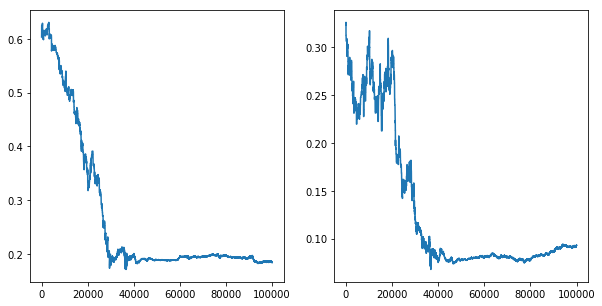

In [11]:
m_error = abs(np.array(params[0])-m)/m
v_error = abs(np.array(params[1])-v)/v

plt.figure(figsize = (10,5))

t = np.linspace(0,len(m_error),len(m_error))
plt.subplot(1,2,1)
plt.plot(t,m_error)

plt.subplot(1,2,2)
plt.plot(t,v_error)
